<a href="https://colab.research.google.com/github/toka-amer/Handwritten-Signature-Verification/blob/main/Stage2Siamese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import time
import random
import numpy as np

import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import preprocess_input

import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__, np.__version__

from tqdm import tqdm
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
random.seed(5)
np.random.seed(5)
tf.random.set_seed(5)

ROOT = '/content/drive/MyDrive/vision_data'

def read_image(index,train):
    path = os.path.join(ROOT, index[0],train, index[1])
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (128,128))
    return image

In [ ]:
PersonA_DIR_Train = '/content/drive/MyDrive/vision_data/personA/Train'
PersonB_DIR_Train = '/content/drive/MyDrive/vision_data/personB/Train'
PersonC_DIR_Train = '/content/drive/MyDrive/vision_data/personC/Train'
PersonD_DIR_Train = '/content/drive/MyDrive/vision_data/personD/Train'
PersonE_DIR_Train = '/content/drive/MyDrive/vision_data/personE/Train'

PersonA_CSV_Train = '/content/drive/MyDrive/vision_data/personA/Train/personA_SigVerificationTrainLabels.csv'
PersonB_CSV_Train = '/content/drive/MyDrive/vision_data/personB/Train/personB_SigVerificationTrainLabels.csv'
PersonC_CSV_Train = '/content/drive/MyDrive/vision_data/personC/Train/personC_SigVerificationTrainLabels.csv'
PersonD_CSV_Train = '/content/drive/MyDrive/vision_data/personD/Train/personD_SigVerificationTrainLabels.csv'
PersonE_CSV_Train = '/content/drive/MyDrive/vision_data/personE/Train/personE_SigVerificationTrainLabels.csv'


PersonA_DIR_Test = '/content/drive/MyDrive/vision_data/personA/Test'
PersonB_DIR_Test = '/content/drive/MyDrive/vision_data/personB/Test'
PersonC_DIR_Test = '/content/drive/MyDrive/vision_data/personC/Test'
PersonD_DIR_Test = '/content/drive/MyDrive/vision_data/personD/Test'
PersonE_DIR_Test = '/content/drive/MyDrive/vision_data/personE/Test'

PersonA_CSV_Test = '/content/drive/MyDrive/vision_data/personA/Test/personA_SigVerificationTestLabels.csv'
PersonB_CSV_Test = '/content/drive/MyDrive/vision_data/personB/Test/personB_SigVerificationTestLabels.csv'
PersonC_CSV_Test = '/content/drive/MyDrive/vision_data/personC/Test/personC_SigVerificationTestLabels.csv'
PersonD_CSV_Test = '/content/drive/MyDrive/vision_data/personD/Test/personD_SigVerificationTestLabels.csv'
PersonE_CSV_Test = '/content/drive/MyDrive/vision_data/personE/Test/personE_SigVerificationTestLabels.csv'

In [ ]:
def get_label(ImageName,path):
   all_files=pd.read_csv(path)
   all_files = np.array(all_files)
   found='false'
   for i in range(len(all_files)):
     if all_files[i][0]==ImageName:
       found='true'
       if all_files[i][1]=="forged":
         return np.array([0,1])
       elif all_files[i][1]=="real":
         return np.array([1,0])
   if found=='false':
     return np.array([0,1])

In [ ]:
print(get_label('personA_15.png',PersonA_CSV_Train))

[1 0]


In [ ]:
def get_real(Person_DIR_Train,Person_CSV_Train):
  real=[]
  for img in tqdm(os.listdir(Person_DIR_Train)):
    ext=img.split('.')[-1]
    if ext!='csv':
      #print(img)
      #print(get_label(img,Person_CSV_Train))
      if get_label(img,Person_CSV_Train)[0]==1:
        #print(img)
        real.append(img)  
  return real

In [ ]:
def get_fake(Person_DIR_Train,Person_CSV_Train):
  fake=[]
  for img in tqdm(os.listdir(Person_DIR_Train)):
    ext=img.split('.')[-1]
    if ext!='csv':
      #print(img)
      #print(get_label(img,Person_CSV_Train))
      if get_label(img,Person_CSV_Train)[0]==0:
        #print(img)
        fake.append(img)  
  return fake

In [ ]:
print(get_real(PersonA_DIR_Train,PersonA_CSV_Train))
print("aaaaaaaaaaaaa")
print(get_fake(PersonA_DIR_Train,PersonA_CSV_Train))

100%|██████████| 41/41 [00:00<00:00, 351.72it/s]


['personA_38.png', 'personA_23.png', 'personA_15.png', 'personA_43.png', 'personA_7.png', 'personA_6.png', 'personA_35.png', 'personA_44.png', 'personA_17.png', 'personA_19.png', 'personA_46.png', 'personA_39.png', 'personA_36.png', 'personA_25.png', 'personA_9.png', 'personA_8.png', 'personA_41.png', 'personA_26.png', 'personA_4.png', 'personA_22.png']
aaaaaaaaaaaaa


100%|██████████| 41/41 [00:00<00:00, 444.39it/s]

['personA_3.png', 'personA_21.png', 'personA_12.png', 'personA_32.png', 'personA_24.png', 'personA_28.png', 'personA_18.png', 'personA_34.png', 'personA_48.png', 'personA_1.png', 'personA_11.png', 'personA_5.png', 'personA_14.png', 'personA_45.png', 'personA_16.png', 'personA_33.png', 'personA_40.png', 'personA_31.png', 'personA_37.png', 'personA_47.png']


In [ ]:
def split_dataset(directory):
    folders = os.listdir(directory)
    
    random.shuffle(folders)
    
    train_list, test_list = {}, {}
    
    # Creating Train-list
    for folder in folders:
        if folder=='personA':
          num_files = len(get_real(PersonA_DIR_Train,PersonA_CSV_Train))
          train_list[folder] = num_files
        elif folder=='personB':
          num_files = len(get_real(PersonB_DIR_Train,PersonB_CSV_Train))
          train_list[folder] = num_files
        elif folder=='personC':
          num_files = len(get_real(PersonC_DIR_Train,PersonC_CSV_Train))
          train_list[folder] = num_files
        elif folder=='personD':
          num_files = len(get_real(PersonD_DIR_Train,PersonD_CSV_Train))
          train_list[folder] = num_files
        elif folder=='personE':
          num_files = len(get_real(PersonE_DIR_Train,PersonE_CSV_Train))
          train_list[folder] = num_files
        
    
    # Creating Test-list
    for folder in folders:
        if folder=='personA':
          num_files = len(get_real(PersonA_DIR_Test,PersonA_CSV_Test))
          test_list[folder] = num_files
        elif folder=='personB':
          num_files = len(get_real(PersonB_DIR_Test,PersonB_CSV_Test))
          test_list[folder] = num_files
        elif folder=='personC':
          num_files = len(get_real(PersonC_DIR_Test,PersonC_CSV_Test))
          test_list[folder] = num_files
        elif folder=='personD':
          num_files = len(get_real(PersonD_DIR_Test,PersonD_CSV_Test))
          test_list[folder] = num_files
        elif folder=='personE':
          num_files = len(get_real(PersonE_DIR_Test,PersonE_CSV_Test))
          test_list[folder] = num_files  
    
    return train_list, test_list

train_list, test_list = split_dataset(ROOT)
print("Length of training list:", len(train_list))
print("Length of testing list :", len(test_list))

# train_list, test list contains the folder names along with the number of files in the folder.
print("\nTest List:", test_list)
print("\nTrain List:", train_list)

100%|██████████| 9/9 [00:00<00:00, 11.88it/s]

Length of training list: 5
Length of testing list : 5

Test List: {'personE': 4, 'personB': 4, 'personD': 4, 'personA': 4, 'personC': 4}

Train List: {'personE': 20, 'personB': 20, 'personD': 20, 'personA': 20, 'personC': 20}


In [ ]:
def create_triplets(folder_list):
    triplets = []
    folders = list(folder_list.keys())
    if folder_list==train_list:
      for folder in folders:
        print(folder)
        real=[]
        fake=[]
        if folder=='personA':
          real=get_real(PersonA_DIR_Train,PersonA_CSV_Train)
          fake=get_fake(PersonA_DIR_Train,PersonA_CSV_Train)
        elif folder=='personB':
          real=get_real(PersonB_DIR_Train,PersonB_CSV_Train)
          fake=get_fake(PersonB_DIR_Train,PersonB_CSV_Train)
        elif folder=='personC':
          real=get_real(PersonC_DIR_Train,PersonC_CSV_Train)
          fake=get_fake(PersonC_DIR_Train,PersonC_CSV_Train)
        elif folder=='personD':
          real=get_real(PersonD_DIR_Train,PersonD_CSV_Train)
          fake=get_fake(PersonD_DIR_Train,PersonD_CSV_Train)
        elif folder=='personE':
          real=get_real(PersonE_DIR_Train,PersonE_CSV_Train)
          fake=get_fake(PersonE_DIR_Train,PersonE_CSV_Train)
        print(len(real))
        print(len(fake))  
        for i in range(len(real)-1):
            k = 0
            for j in range(i+1, len(real)):
                anchor = (folder, real[i])
                positive = (folder, real[j])
                negative = (folder,fake[k])
                triplets.append((anchor, positive, negative))
                k +=1
              
    elif folder_list==test_list:
      for folder in folders:
        real=[]
        fake=[]
        if folder=='personA':
          real=get_real(PersonA_DIR_Test,PersonA_CSV_Test)
          fake=get_fake(PersonA_DIR_Test,PersonA_CSV_Test)
        elif folder=='personB':
          real=get_real(PersonB_DIR_Test,PersonB_CSV_Test)
          fake=get_fake(PersonB_DIR_Test,PersonB_CSV_Test)
        elif folder=='personC':
          real=get_real(PersonC_DIR_Test,PersonC_CSV_Test)
          fake=get_fake(PersonC_DIR_Test,PersonC_CSV_Test)
        elif folder=='personD':
          real=get_real(PersonD_DIR_Test,PersonD_CSV_Test)
          fake=get_fake(PersonD_DIR_Test,PersonD_CSV_Test)
        elif folder=='personE':
          real=get_real(PersonE_DIR_Test,PersonE_CSV_Test)
          fake=get_fake(PersonE_DIR_Test,PersonE_CSV_Test)
          
        print(len(real))
        print(len(fake))  
        for i in range(len(real)-1):
            k = 0
            for j in range(i+1, len(real)):
                anchor = (folder, real[i])
                positive = (folder, real[j])
                negative = (folder,fake[k])
                triplets.append((anchor, positive, negative))
                k +=1
               
    random.shuffle(triplets)
    return triplets

In [ ]:
train_triplet = create_triplets(train_list)
test_triplet  = create_triplets(test_list)

print("Number of training triplets:", len(train_triplet))
print("Number of testing triplets :", len(test_triplet))

print("\nExamples of triplets:")
for i in range(5):
    print(train_triplet[i])

personE


100%|██████████| 41/41 [00:00<00:00, 455.93it/s]


20
20
personB


100%|██████████| 41/41 [00:00<00:00, 453.31it/s]


20
20
personD


100%|██████████| 41/41 [00:00<00:00, 445.68it/s]


20
20
personA


100%|██████████| 41/41 [00:00<00:00, 370.84it/s]


20
20
personC


100%|██████████| 41/41 [00:00<00:00, 434.02it/s]


20
20


100%|██████████| 9/9 [00:00<00:00, 400.14it/s]


4
4


100%|██████████| 9/9 [00:00<00:00, 421.73it/s]


4
4


100%|██████████| 9/9 [00:00<00:00, 357.48it/s]


4
4


100%|██████████| 9/9 [00:00<00:00, 412.04it/s]


4
4


100%|██████████| 9/9 [00:00<00:00, 364.10it/s]

4
4
Number of training triplets: 950
Number of testing triplets : 30

Examples of triplets:
(('personA', 'personA_43.png'), ('personA', 'personA_19.png'), ('personA', 'personA_28.png'))
(('personB', 'personB_9.png'), ('personB', 'personB_4.png'), ('personB', 'personB_11.png'))
(('personA', 'personA_25.png'), ('personA', 'personA_9.png'), ('personA', 'personA_3.png'))
(('personC', 'personC_10.png'), ('personC', 'personC_33.png'), ('personC', 'personC_36.png'))
(('personB', 'personB_43.png'), ('personB', 'personB_6.png'), ('personB', 'personB_47.png'))


In [ ]:
def get_batch(triplet_list,isTrain, batch_size=256, preprocess=False):
    batch_steps = len(triplet_list)//batch_size
    
    for i in range(batch_steps+1):
        anchor   = []
        positive = []
        negative = []

        j = i*batch_size
        while j<(i+1)*batch_size and j<len(triplet_list):
            a, p, n = triplet_list[j]
            if isTrain:
              anchor.append(read_image(a,'Train'))
              positive.append(read_image(p,'Train'))
              negative.append(read_image(n,'Train'))
              j+=1
            else:
              anchor.append(read_image(a,'Test'))
              positive.append(read_image(p,'Test'))
              negative.append(read_image(n,'Test'))
              j+=1
          
   
        anchor = np.array(anchor)
        positive = np.array(positive)
        negative = np.array(negative)

        if preprocess:
            anchor = preprocess_input(anchor)
            positive = preprocess_input(positive)
            negative = preprocess_input(negative)

        yield ([anchor, positive, negative])

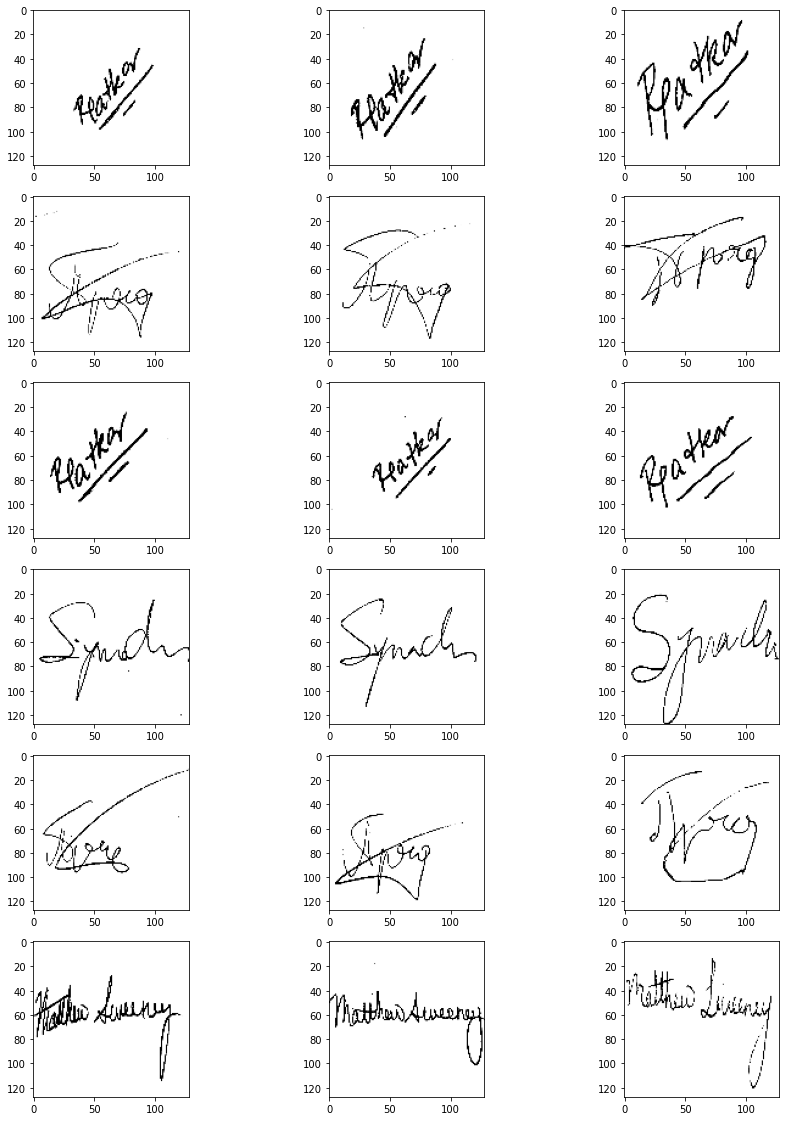

In [ ]:
num_plots = 6

f, axes = plt.subplots(num_plots, 3, figsize=(15, 20))

for x in get_batch(train_triplet,True, batch_size=num_plots, preprocess=True):
    a,p,n = x
    for i in range(num_plots):
        axes[i, 0].imshow(a[i])
        axes[i, 1].imshow(p[i])
        axes[i, 2].imshow(n[i])
        i+=1
    break

In [ ]:
from tensorflow.keras import backend, layers, metrics

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
def get_encoder(input_shape):
    """ Returns the image encoding model """

    pretrained_model = Xception(
        input_shape=input_shape,
        weights='imagenet',
        include_top=False,
        pooling='avg',
    )
    
    for i in range(len(pretrained_model.layers)-27):
        pretrained_model.layers[i].trainable = False

    encode_model = Sequential([
        pretrained_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1))
    ], name="Encode_Model")
    return encode_model

In [ ]:
class DistanceLayer(layers.Layer):
    # A layer to compute ‖f(A) - f(P)‖² and ‖f(A) - f(N)‖²
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, anchor, positive, negative):
        ap_distance = tf.reduce_sum(tf.square(anchor - positive), -1)
        an_distance = tf.reduce_sum(tf.square(anchor - negative), -1)
        return (ap_distance, an_distance)
    

def get_siamese_network(input_shape = (128, 128, 3)):
    encoder = get_encoder(input_shape)
    
    # Input Layers for the images
    anchor_input   = layers.Input(input_shape, name="Anchor_Input")
    positive_input = layers.Input(input_shape, name="Positive_Input")
    negative_input = layers.Input(input_shape, name="Negative_Input")
    
    ## Generate the encodings (feature vectors) for the images
    encoded_a = encoder(anchor_input)
    encoded_p = encoder(positive_input)
    encoded_n = encoder(negative_input)
    
    # A layer to compute ‖f(A) - f(P)‖² and ‖f(A) - f(N)‖²
    distances = DistanceLayer()(
        encoder(anchor_input),
        encoder(positive_input),
        encoder(negative_input)
    )
    
    # Creating the Model
    siamese_network = Model(
        inputs  = [anchor_input, positive_input, negative_input],
        outputs = distances,
        name = "Siamese_Network"
    )
    return siamese_network

siamese_network = get_siamese_network()
siamese_network.summary()

83683744/83683744 [==============================] - 4s 0us/step
Model: "Siamese_Network"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Anchor_Input (InputLayer)      [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Positive_Input (InputLayer)    [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Negative_Input (InputLayer)    [(None, 128, 128, 3  0           []                               
                   

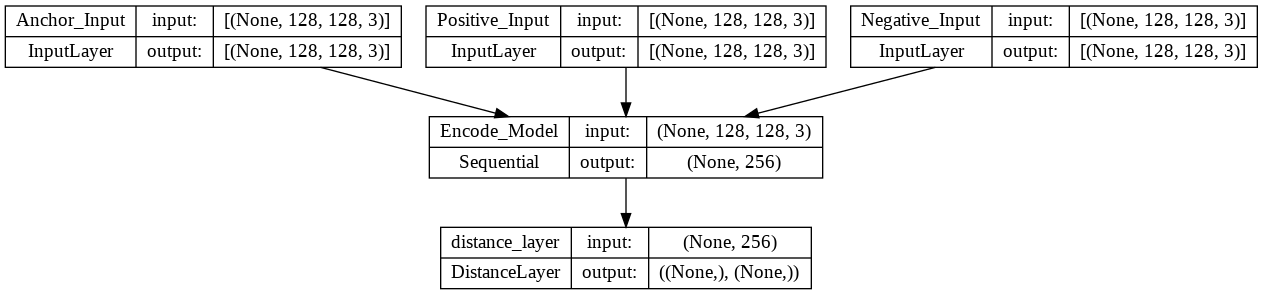

In [ ]:
plot_model(siamese_network, show_shapes=True, show_layer_names=True)

In [ ]:
class SiameseModel(Model):
    # Builds a Siamese model based on a base-model
    def __init__(self, siamese_network, margin=1.0):
        super(SiameseModel, self).__init__()
        
        self.margin = margin
        self.siamese_network = siamese_network
        self.loss_tracker = metrics.Mean(name="loss")

    def call(self, inputs):
        return self.siamese_network(inputs)

    def train_step(self, data):
        # GradientTape get the gradients when we compute loss, and uses them to update the weights
        with tf.GradientTape() as tape:
            loss = self._compute_loss(data)
            
        gradients = tape.gradient(loss, self.siamese_network.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.siamese_network.trainable_weights))
        
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def test_step(self, data):
        loss = self._compute_loss(data)
        
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def _compute_loss(self, data):
        # Get the two distances from the network, then compute the triplet loss
        ap_distance, an_distance = self.siamese_network(data)
        loss = tf.maximum(ap_distance - an_distance + self.margin, 0.0)
        return loss

    @property
    def metrics(self):
        # We need to list our metrics so the reset_states() can be called automatically.
        return [self.loss_tracker]

In [ ]:
siamese_model = SiameseModel(siamese_network)
optimizer = Adam(learning_rate=1e-3, epsilon=1e-01)
siamese_model.compile(optimizer=optimizer)


In [ ]:
def test_on_triplets(batch_size = 256):
    pos_scores, neg_scores = [], []
  
    for data in get_batch(test_triplet, False,batch_size=batch_size):
        prediction = siamese_model.predict(data)
        pos_scores += list(prediction[0])
        neg_scores += list(prediction[1])
    
    accuracy = np.sum(np.array(pos_scores) < np.array(neg_scores)) / len(pos_scores)
    ap_mean = np.mean(pos_scores)
    an_mean = np.mean(neg_scores)
    ap_stds = np.std(pos_scores)
    an_stds = np.std(neg_scores)
    
    print(f"Accuracy on test = {accuracy:.5f}")
    return (accuracy, ap_mean, an_mean, ap_stds, an_stds)

In [ ]:
save_all = False
epochs = 30
batch_size = 128

max_acc = 0
train_loss = []
test_metrics = []

for epoch in range(1, epochs+1):
    t = time.time()
    
    # Training the model on train data
    epoch_loss = []
    for data in get_batch(train_triplet,True, batch_size=batch_size):
        loss = siamese_model.train_on_batch(data)
        epoch_loss.append(loss)
    epoch_loss = sum(epoch_loss)/len(epoch_loss)
    train_loss.append(epoch_loss)

    print(f"\nEPOCH: {epoch} \t (Epoch done in {int(time.time()-t)} sec)")
    print(f"Loss on train    = {epoch_loss:.5f}")
    
    # Testing the model on test data
    metric = test_on_triplets(batch_size=batch_size)
    test_metrics.append(metric)
    accuracy = metric[0]
    
    # Saving the model weights
    if save_all or accuracy>=max_acc:
        siamese_model.save_weights("siamese_model")
        max_acc = accuracy

# Saving the model after all epochs run
siamese_model.save_weights("siamese_model-final")


EPOCH: 1 	 (Epoch done in 181 sec)
Loss on train    = 0.82101
1/1 [==============================] - 3s 3s/step
Accuracy on test = 0.73333

EPOCH: 2 	 (Epoch done in 19 sec)
Loss on train    = 0.74061
1/1 [==============================] - 0s 45ms/step
Accuracy on test = 0.73333

EPOCH: 3 	 (Epoch done in 19 sec)
Loss on train    = 0.58001
1/1 [==============================] - 0s 39ms/step
Accuracy on test = 0.73333

EPOCH: 4 	 (Epoch done in 19 sec)
Loss on train    = 0.44376
1/1 [==============================] - 0s 37ms/step
Accuracy on test = 0.70000

EPOCH: 5 	 (Epoch done in 21 sec)
Loss on train    = 0.46378
1/1 [==============================] - 0s 39ms/step
Accuracy on test = 0.66667

EPOCH: 6 	 (Epoch done in 19 sec)
Loss on train    = 0.38661
1/1 [==============================] - 0s 37ms/step
Accuracy on test = 0.73333

EPOCH: 7 	 (Epoch done in 19 sec)
Loss on train    = 0.32580
1/1 [==============================] - 0s 40ms/step
Accuracy on test = 0.76667

EPOCH: 8 	 (E

In [ ]:
def extract_encoder(model):
    encoder = get_encoder((128, 128, 3))
    i=0
    for e_layer in model.layers[0].layers[3].layers:
        layer_weight = e_layer.get_weights()
        encoder.layers[i].set_weights(layer_weight)
        i+=1
    return encoder

encoder = extract_encoder(siamese_model)
encoder.save_weights("encoder")
encoder.summary()

Model: "Encode_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 batch_normalization_9 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 lambda_1 (Lambda)           (None, 256)               0         
                                                      

In [ ]:
def classify_images(face_list1, face_list2, threshold=1.3):
    # Getting the encodings for the passed faces
    tensor1 = encoder.predict(face_list1)
    tensor2 = encoder.predict(face_list2)
    
    distance = np.sum(np.square(tensor1-tensor2), axis=-1)
    prediction = np.where(distance<=threshold, 0, 1)
    return prediction

1/1 [==============================] - 0s 23ms/step

Accuracy of model: 0.7666666666666667



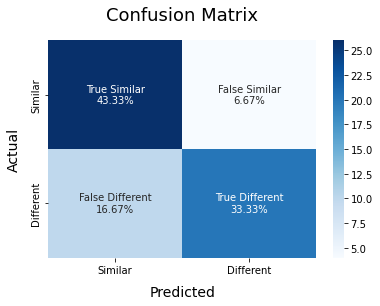

In [ ]:
def ModelMetrics(pos_list, neg_list):
    true = np.array([0]*len(pos_list)+[1]*len(neg_list))
    pred = np.append(pos_list, neg_list)
    
    # Compute and print the accuracy
    print(f"\nAccuracy of model: {accuracy_score(true, pred)}\n")
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(true, pred)

    categories  = ['Similar','Different']
    names = ['True Similar','False Similar', 'False Different','True Different']
    percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


pos_list = np.array([])
neg_list = np.array([])

for data in get_batch(test_triplet,False, batch_size=256):
    a, p, n = data
    pos_list = np.append(pos_list, classify_images(a, p))
    neg_list = np.append(neg_list, classify_images(a, n))
    break

ModelMetrics(pos_list, neg_list)